# Clustering

In this workbook we'll look at the exoplanets data and see if we can find "similar" planets. 

In [42]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
filepath = os.path.join("..","Space Data")


In [5]:
df = pd.read_csv(os.path.join(filepath,"exoplanets.csv"))

In [6]:
df.head()

,loc_rowid,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,pl_bmassprov,pl_radj,pl_dens,st_teff,st_mass,st_rad,rowupdate,pl_facility,last_updated
0,1,11 Com,b,11 Com b,Radial Velocity,1,326.03000,1.29,0.231,NaN,19.40,Msini,NaN,NaN,4742.0,2.70,19.00,2014-05-14,Xinglong Station,2014-05-14
1,2,11 UMi,b,11 UMi b,Radial Velocity,1,516.21997,1.53,0.080,NaN,14.74,Msini,NaN,NaN,4213.0,2.78,29.79,2018-09-06,Thueringer Landessternwarte Tautenburg,2018-09-06
2,3,14 And,b,14 And b,Radial Velocity,1,185.84000,0.83,0.000,NaN,4.80,Msini,NaN,NaN,4813.0,2.20,11.00,2014-05-14,Okayama Astrophysical Observatory,2014-05-14
3,4,14 Her,b,14 Her b,Radial Velocity,1,1773.40002,2.93,0.370,NaN,4.66,Msini,NaN,NaN,5338.0,0.90,0.93,2018-09-06,W. M. Keck Observatory,2018-09-06
4,5,16 Cyg B,b,16 Cyg B b,Radial Velocity,1,798.50000,1.66,0.680,NaN,1.78,Msini,NaN,NaN,5750.0,1.08,1.13,2018-09-06,Multiple Observatories,2018-09-06


In [7]:
df.describe()

,loc_rowid,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,pl_radj,pl_dens,st_teff,st_mass,st_rad
count,3912.000000,3912.000000,3.811000e+03,2251.000000,1273.000000,753.000000,1499.000000,3060.000000,420.000000,3749.000000,3144.000000,3628.000000
mean,1956.500000,1.774540,2.348210e+03,6.733935,0.165772,86.077950,2.539475,0.367803,2.446722,5490.769312,1.011667,1.561519
std,1129.441455,1.161817,1.186270e+05,82.517157,0.191440,8.036322,4.444118,0.420180,5.063867,1674.862186,0.660170,3.769870
min,1.000000,1.000000,9.070629e-02,0.004400,0.000000,7.700000,0.000060,0.030000,0.030000,575.000000,0.010000,0.040000
25%,978.750000,1.000000,4.570720e+00,0.057800,0.020000,86.020000,0.117500,0.140000,0.410750,5044.000000,0.810000,0.800000
50%,1956.500000,1.000000,1.194014e+01,0.118900,0.100000,88.000000,0.920000,0.207000,0.985000,5600.000000,0.970000,0.980000
75%,2934.250000,2.000000,4.242563e+01,0.685150,0.240000,89.240000,2.570000,0.311250,2.500000,5920.000000,1.130000,1.250000
max,3912.000000,8.000000,7.300000e+06,2500.000000,0.950000,90.760000,55.590000,6.900000,77.700000,57000.000000,23.560000,71.230000


In [8]:
df.dtypes

loc_rowid          int64
pl_hostname       object
pl_letter         object
pl_name           object
pl_discmethod     object
pl_pnum            int64
pl_orbper        float64
pl_orbsmax       float64
pl_orbeccen      float64
pl_orbincl       float64
pl_bmassj        float64
pl_bmassprov      object
pl_radj          float64
pl_dens          float64
st_teff          float64
st_mass          float64
st_rad           float64
rowupdate         object
pl_facility       object
last_updated      object
dtype: object

In [9]:
df.shape

(3912, 20)

In [27]:
df.isnull().sum()

loc_rowid           0
pl_hostname         0
pl_letter           0
pl_name             0
pl_discmethod       0
pl_pnum             0
pl_orbper         101
pl_orbsmax       1661
pl_orbeccen      2639
pl_orbincl       3159
pl_bmassj        2413
pl_bmassprov     2413
pl_radj           852
pl_dens          3492
st_teff           163
st_mass           768
st_rad            284
rowupdate           0
pl_facility         0
last_updated        0
dtype: int64

There are quite a few null values for some of these. We can use the Imputer tool to fill in the gaps, but it's likely the clustering algorithm will use these imputed values to distinguish points, which will lead to essentailly meaningless clusters. 

Therefore, we'll restrain our clustering to the values with the fewest missing values for now. It's always possible to add other values in to see how things change. 

Additionally, we'll stick to numerical columns first. It is possible to use categorical variables by creating [dummy](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) variables, but we'll not do that for this simple example.

In [104]:
df_numeric = df[['st_teff','st_mass','st_rad','pl_radj']]

In [105]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values = np.nan,strategy = 'median')
X = imp_mean.fit_transform(df_numeric)

To visualise high-dimensional datasets, there are a few methods available for what's called [Dimensionality Reduction](https://en.wikipedia.org/wiki/Dimensionality_reduction).

In this example, we'll use [t-sne](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding). 

Essentially, it is projecting down the high-dimensional data down to 2 dimensions This helps us visualise "similar" points as being close together when their similarity may be defined by many variables. 

In [106]:
from sklearn.manifold import TSNE

In [107]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3912 samples in 0.001s...
[t-SNE] Computed neighbors for 3912 samples in 0.049s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3912
[t-SNE] Computed conditional probabilities for sample 2000 / 3912
[t-SNE] Computed conditional probabilities for sample 3000 / 3912
[t-SNE] Computed conditional probabilities for sample 3912 / 3912
[t-SNE] Mean sigma: 0.817745
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.461529
[t-SNE] KL divergence after 300 iterations: 0.840227


Text(0.5,1,'TSNE Plot')

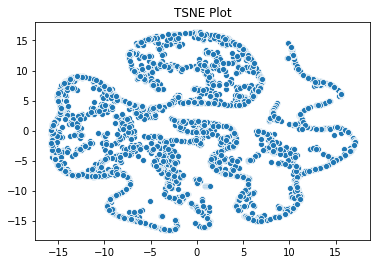

In [148]:
xt = tsne_results[:,0]
yt = tsne_results[:,1]

sns.scatterplot(x=x,y=y)
plt.title("TSNE Plot")

## And now clustering...

There are [many](https://scikit-learn.org/stable/modules/clustering.html) clustering techniques. In general they are split into supervised and unsupervised. 

- **Supervised** means you have knowledge of the true clusters, so you can evaluate your model on labeled data. 
- **Unsupervised** means you don't know what the true clusters are.

Since we don't know how these exoplanets should be identifed, we have an unsupervised clustering problem. 

We'll use K-Means clustering as it's probably the most well known and easy to understand. 

[Nice example](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

### Evaluation

There are a few methods for evaluating whether a clustering method was "successful." It often depends on what you're trying to do, and if your data is labeled or not. 

In this example I've used the [silhouette score](https://en.wikipedia.org/wiki/Silhouette_(clustering)) to evaluate the model. Feel free to use, or compare others to get a more robust evaluation metric. 

A high silhouette score (max of 1) means points within a cluster are more similar points within that cluster compared to other clusters. 

In [128]:
#Function for KMEANS
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
cmap = cm.get_cmap("Spectral")


def K_means(X,cluster_list):
    """This function will iterate through a list of cluster sizes (2-n) and conduct a K-Means clustering of that size. 
    The Silhouette score will be caputred for each cluster and overall. 
    The results will be plotted along with the t-sne projection to make a model selection."""
    for n_clusters in cluster_list:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        col = 'K'+str(n_clusters)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cmap(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        # colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        colors = cmap(cluster_labels.astype(float)/n_clusters)
        ax2.scatter(xt,yt, marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')


        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

        plt.show()

For n_clusters = 2 The average silhouette_score is : 0.972971742622


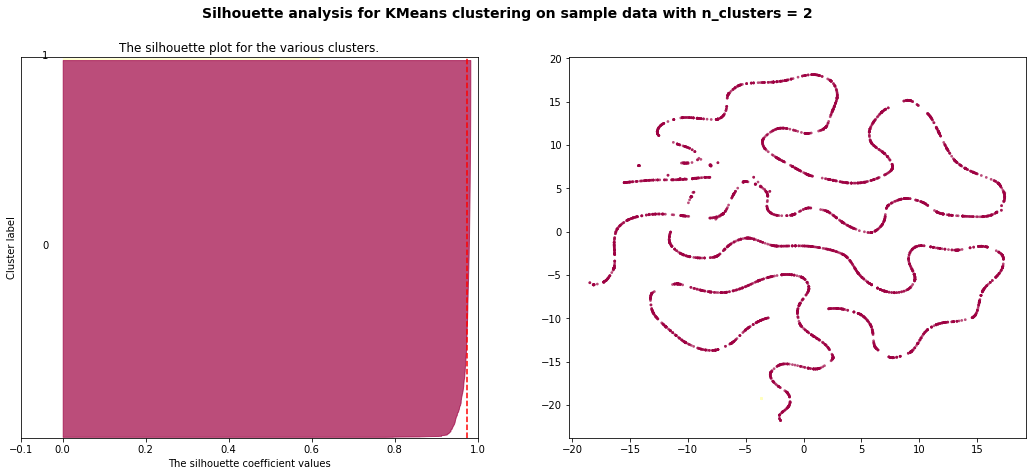

For n_clusters = 3 The average silhouette_score is : 0.624170992835


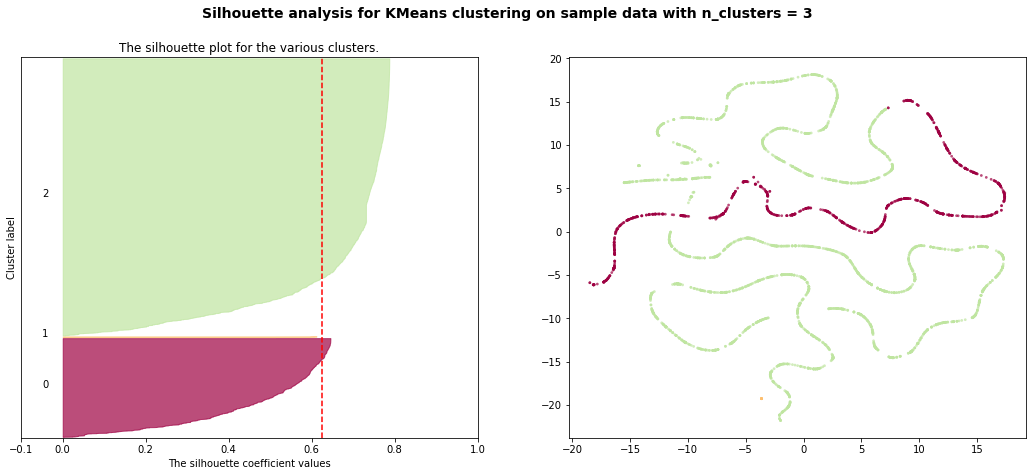

For n_clusters = 4 The average silhouette_score is : 0.624985833605


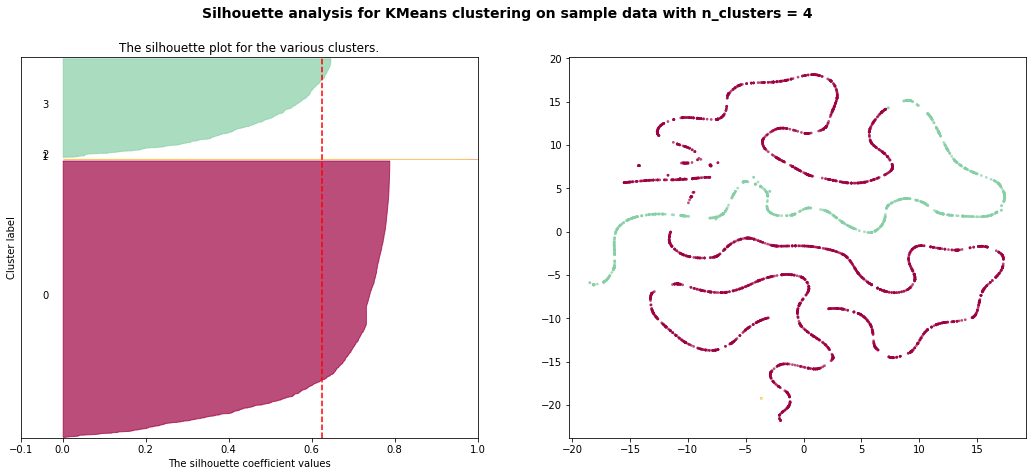

For n_clusters = 5 The average silhouette_score is : 0.562361914444


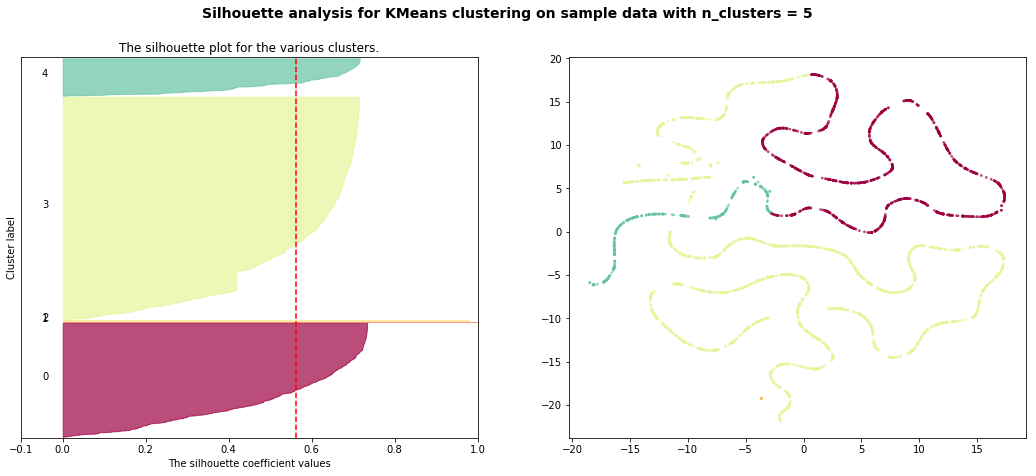

For n_clusters = 6 The average silhouette_score is : 0.545091880038


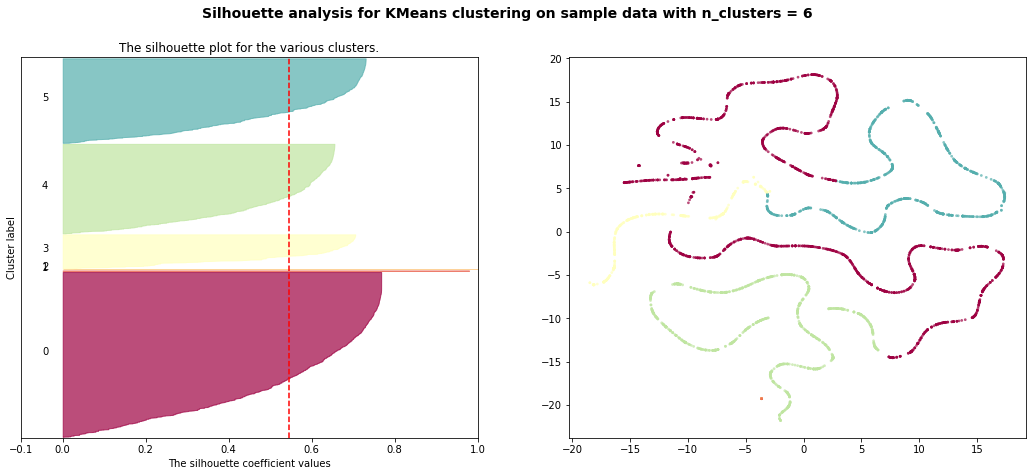

In [120]:
clusters_list = [2,3,4,5,6]
K_means(X,clusters_list)

## Selecting a model

Remember, we're looking for a high silhouette score, but also something usable that "makes sense". 

Cluster size 2 gives us a high silhouette score, but it seems like only 1 or 2 planets are in the 2nd cluster. It's worth identifying which planets those are. 

For a more interesting challenge, we can choose cluster size 3, which at least gives us 2 considerably sized clusters. 

## CHALLENGE: Can you find commonalities between planets in each cluster? 

In [ ]:
#Code here...

## CHALLENGE: Can you create a model that predicts which cluster each planet will be assigned to? Which features were most influential in that prediction model?

In [132]:
#Code here...

## CHALLENGE: Which planet(s) closest resemble Earth?

In [134]:
#Code here...

## Embedding methods

For those interested in the details of embedding methods, a relatively new method has emerged called UMAP (uniform manifold approximation and projection) - you can read the paper on the arXiv here:

https://arxiv.org/abs/1802.03426

And read in more natural English how the algorithm works here:

https://umap-learn.readthedocs.io/en/latest/how_umap_works.html

The fact that the dimension-reduced data appear to lie on a curve is probably due to the embedding algorithm finding a dominant feature which distinguishes points from one another, i.e. the learned 'distance metric' is approximately a function of a single feature. You can see an example of this in the link above, where the distance metric is artificially limited to consider a single feature.

/opt/conda/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


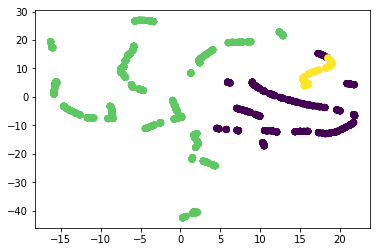

In [168]:
import umap
embedding = umap.UMAP(n_neighbors=100, min_dist=0).fit_transform(X)
n_clusters = 5
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(X)
plt.scatter(embedding[:,0], embedding[:,1], c=cluster_labels)